<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/reinforcement_learning/Q_learning/q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-Learning
### Podstawowe funkcje

In [0]:
import gym

env = gym.make('FrozenLake-v0')  # będziemy używać środowiska FrozenLake

In [3]:
print(env.observation_space.n)  # zwraca liczbę stanów
print(env.action_space.n)  # zwraca liczbę akcji

16
4


In [4]:
env.reset()  # resetuje środowisko do stanu domyślnego

0

In [9]:
action = env.action_space.sample()  # zwraca losową akcję
print(action)

2


In [0]:
new_state, reward, done, info = env.step(action)  # podejmuje akcję

In [11]:
env.render()  # renderuje GUI środowiska

  (Up)
SFFF
FHFH
FFFH
HFFG


### Środowisko FrozenLake

`Frozenlake-v0` to jedno z najprostszych środowisk w Open AI Gym. Celem jest nawigowanie agenta po zamarzniętym jeziorze bez wpadnięcia do wody. Jest tu:

*   16 stanów (jeden dla każdego pola)
*   4 możliwe akcje (LEFT, RIGHT, DOWN, UP)
*   4 różne typy pól (F: frozen, H: hole, S: start, G: goal)

### Budowa Q-Table

Pierwszą rzeczą jakiej potrzebujemy jest budowa pustej Q-tabeli, której możemy użyć do przechowywania i uaktualniania naszych wartości.

In [0]:
# import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [14]:
Q = np.zeros((STATES, ACTIONS))  # stworzenie macierzy zer
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Stałe
Musimy zdefinować stałe, które będą użyte do aktualizowania Q-tabeli i powiedzą agentowi kiedy przerwać trening.

In [0]:
EPISODES = 2000  # ile razy odpalić środowisko od początku
MAX_STEPS = 100  # maksymalna ilość kroków dozwolonych na każde uruchomienie środowiska

LEARNING_RATE = 0.81  # współczynnik uczenia
GAMMA = 0.96

### Podjęcie akcji
Możemy podjąć akcję używając jednej z dwóch metod:

1.   Wybierając losowo dozwoloną akcję
2.   Używając obecnej Q-tabeli do znalezienia najlepszej akcji

In [0]:
epsilon = 0.9  # zaczynamy z 90% szans na podjęcie losowej akcji

# kod do podjęcia akcji
if np.random.uniform(0, 1) < epsilon:  # sprawdza czy losowo wybrana wartość jest mniejsza niż epsilon
  action = env.action_space.sample()  # podejmuje losową akcję
else:
  action = np.argmax(Q[state, :])  # używa Q-tabeli do podjęcia najlepszej akcji bazując na obecnych wartościach

### Aktualizacja wartości Q

In [0]:
#Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

### Gotowy program złożony w całość

In [0]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS)) 

EPISODES = 1500  # ile razy odpalić środowisko od początku
MAX_STEPS = 100  # maksymalna ilość kroków dozwolonych na każde uruchomienie środowiska

LEARNING_RATE = 0.81  # współczynnik uczenia
GAMMA = 0.96

RENDER = False  # jeśli chcesz zobaczyć trening ustaw na True

epsilon = 0.9

In [24]:
rewards = [] 
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f'Average reward: {sum(rewards)/len(rewards)}:')
# teraz możemy zobaczyć nasze wartośći Q!

[[2.39426868e-01 1.62526398e-02 1.54562519e-02 1.59202830e-02]
 [1.98547854e-03 6.78832722e-03 2.04410091e-03 2.05880712e-01]
 [1.17939011e-01 6.88565988e-03 5.78809926e-03 6.92566173e-03]
 [6.13191495e-03 3.05238706e-03 2.96899524e-03 6.79343079e-03]
 [2.33621805e-01 1.00620775e-02 7.89787111e-03 1.35511328e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.19855689e-02 1.73767651e-04 1.74687284e-04 1.28973108e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.44127917e-03 4.78581497e-03 3.20147771e-03 3.35419577e-01]
 [3.29275604e-03 8.13401945e-01 1.53087650e-02 4.71493137e-03]
 [1.85896330e-01 2.24225014e-03 1.32615571e-03 2.17757207e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.86168854e-02 6.01188267e-02 6.41986796e-01 4.52771138e-03]
 [2.39216419e-01 4.87311938e-01 1.45339891e-01 2.17005939e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

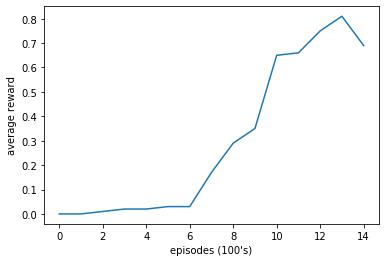

In [26]:
# możemy narysować postęp trenowania i zobaczyć jak agent się polepsza
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values) / len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

### Źródło:
[https://www.youtube.com/watch?v=tPYj3fFJGjk](https://www.youtube.com/watch?v=tPYj3fFJGjk)